# Final Project: Survival Analysis of the Animal Adoption Dataset

In this project, I will perform the Survival Analysis over the animal adoption data set available [here](https://www.kaggle.com/datasets/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes).
I have to admit that the very first aim of this analysis was to compare predictive abilities of surviaval-analysis vs
other regression approaches which do not take into account the censored data. However, I was not able to access the
values of neither hazard nor survival function at a given time (and subsequently evaluate the performance between
different models because of multiple reasons. For instance, it is complicated to evaluate all models on the very same
sets of data where even test set is subject of censoring. Another reason was my own technical incapability to evaluate
the hazard or survival function at a given time for a given individual. For this reason, I will perform only the
survival analysis and evaluate the
results.

In this project, I will try to test the following hypotheses:
- Does the animal species matter in adoption?
- Does the breed of any kind matter?
- Does the age of an animal matter?

Other goal of this project is to create reproducible functions which allow to perform specific tasks related to the
survival analysis

Unfortunately, I haven't found any package designed for statistical inference with survival analysis. Therefore I
won't be able to evaluate p-values and all my conclusions will be rather subjective.

## 1 EDA and Initialization

The first steps in my analysis is a simple Exploratory Data Analysis and a very basic feature engineering

### 1.1 General Steps

In [6]:
# load the full dataset
import pandas as pd
data_full = pd.read_csv("../Data/aac_intakes_outcomes.csv")

In [7]:
# dimensions of our dataset
data_full.shape

(79672, 41)

In [8]:
# first 15 rows
data_full.head(15)

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,...,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,...,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,...,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,...,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,...,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444
5,15 years,A141142,1998-06-01 00:00:00,NaN,Return to Owner,Spayed Female,5475,15.0,"(12.5, 15.0]",2013-11-17 11:40:00,...,"(12.5, 15.0]",2013-11-16 14:46:00,11,2013,2013-11,Saturday,14,1.0,0 days 20:54:00.000000000,0.870833
6,15 years,A163459,1999-10-19 00:00:00,NaN,Return to Owner,Intact Female,5475,15.0,"(12.5, 15.0]",2014-11-14 19:28:00,...,"(12.5, 15.0]",2014-11-14 15:11:00,11,2014,2014-11,Friday,15,1.0,0 days 04:17:00.000000000,0.178472
7,15 years,A165752,1999-08-18 00:00:00,NaN,Return to Owner,Neutered Male,5475,15.0,"(12.5, 15.0]",2014-09-15 16:35:00,...,"(12.5, 15.0]",2014-09-15 11:28:00,9,2014,2014-09,Monday,11,1.0,0 days 05:07:00.000000000,0.213194
8,15 years,A178569,1999-03-17 00:00:00,NaN,Return to Owner,Neutered Male,5475,15.0,"(12.5, 15.0]",2014-03-23 15:57:00,...,"(12.5, 15.0]",2014-03-17 09:45:00,3,2014,2014-03,Monday,9,1.0,6 days 06:12:00.000000000,6.258333
9,18 years,A189592,1997-08-01 00:00:00,NaN,Return to Owner,Spayed Female,6570,18.0,"(17.5, 20.0]",2015-09-18 19:04:00,...,"(17.5, 20.0]",2015-09-18 17:46:00,9,2015,2015-09,Friday,17,1.0,0 days 01:18:00.000000000,0.054167


In [9]:
# print all columns
data_full.columns

Index(['age_upon_outcome', 'animal_id_outcome', 'date_of_birth',
       'outcome_subtype', 'outcome_type', 'sex_upon_outcome',
       'age_upon_outcome_(days)', 'age_upon_outcome_(years)',
       'age_upon_outcome_age_group', 'outcome_datetime', 'outcome_month',
       'outcome_year', 'outcome_monthyear', 'outcome_weekday', 'outcome_hour',
       'outcome_number', 'dob_year', 'dob_month', 'dob_monthyear',
       'age_upon_intake', 'animal_id_intake', 'animal_type', 'breed', 'color',
       'found_location', 'intake_condition', 'intake_type', 'sex_upon_intake',
       'count', 'age_upon_intake_(days)', 'age_upon_intake_(years)',
       'age_upon_intake_age_group', 'intake_datetime', 'intake_month',
       'intake_year', 'intake_monthyear', 'intake_weekday', 'intake_hour',
       'intake_number', 'time_in_shelter', 'time_in_shelter_days'],
      dtype='object')

Our dataset consists of over 75 000 observations and 41 features. Some of the features are not relevant for our
analysis and some need to be e.g. converted to dummy which I'll perform later. There could've been much more effort
devoted to this step, however I do not believe it is a key element of the course so I'll dare to perform it only at a
just sufficient level.

### 1.2 Feature Engineering

In [10]:
# n of unique animal colors
len(data_full.color.unique())

529

The first transformed feature is the *color* variable. I assume it might be important to our analysis, however we
should reduce its dimension by simply removing the 2nd color for multi-colored animals

In [11]:
data_full['color'] = [i.split("/")[0] for i in data_full.color]

In [8]:
len(data_full.color.unique())

58

Hereby we have reduced the dimension about 10-fold. Unfortunately, the color variable has caused issued during the
estimation of a model, hence I will not use it further. Another key feature might be the bread of a particular animal.
There are many approaches, howeverthe most simple one is to differentiate between *mix* and *pure* breeds by creating
a dummy variable *is_breed*.

In [24]:
# all unique categories
len(data_full['breed'].unique())

2059

In [25]:
import numpy as np
data_full['is_mix'] = (list(int('Mix' in k) for k in data_full['breed']))

In [26]:
# value counts
data_full.is_mix.value_counts()

1    64032
0    11212
Name: is_mix, dtype: int64

Another important feature might refer to the particular animal's age. As we're unable to measure its age in time (we should not leak the
information about when did a particular event happen), the year of animal's birth might be a good proxy

In [27]:
# year of birth by extracting first 4 digits from a date
data_full['year_born'] = data_full['date_of_birth'].str[:4]

In [28]:
data_full.animal_type.value_counts()

Dog     45366
Cat     29539
Bird      339
Name: animal_type, dtype: int64

Our dataset contains only 4 categories. I suppose the animal species is a key feature to our analysis and the level 'Other' might cause serious
issues. Therefore I'd prefer to drop it in our case

In [29]:
# keep only cats, birds and dogs
data_full = data_full.loc[data_full['animal_type'] != 'Other']

Our dataset also contains many outcomes for the animal. Therefore I convert these to a simple binary format
*adopted-not adopted*.

In [30]:
data_full['outcome_type'].value_counts()

adopted        48303
not_adopted    26936
Name: outcome_type, dtype: int64

In [31]:
outcome_recode = {
    'Adoption': 'adopted',
    'Return to Owner': 'adopted',
    'Rto-Adopt': 'adopted',
    'Transfer': 'not_adopted',
    'Euthanasia': 'not_adopted',
    'Died': 'not_adopted',
    'Missing': 'not_adopted',
    'Disposal': 'not_adopted',
    'Relocate': 'not_adopted'
}

In [32]:
data_full = data_full.replace({'outcome_type': outcome_recode})

For the non-survival analysis, all not adopted cases are irrelevant as they predict only single dependent variable. Therefore it is useful to create
a new variable as a combination of time and being adopted.

In [36]:
# all features
features = ['outcome_type', 'time_in_shelter_days', 'is_mix', 'age_upon_intake_(years)',
            'animal_type']
# list of numeric features - not to be converted to dummy
numeric_features = ['age_upon_intake_(years)',
                    'time_in_shelter_days',
                    'is_mix']
# list of categorical features, to be converted
cat_features = list(col for col in features if col not in numeric_features)

In [37]:
# convert the categorical variables to dummies
data_dummified = pd.get_dummies(data_full[features], columns=cat_features, drop_first=True)

In [38]:
data_dummified['outcome_type_not_adopted'] = list(
    elem == 1 for elem in data_dummified['outcome_type_not_adopted'])

## 2 Modelling

In this section, I will perform the actual modelling. The package I use is not primarily designed for statistical
inference, so I will not present many measures of uncertainty for our models. I am aware of this insufficiency.
One possible solution could be to use bootstrapping to obtain confidence interval, however the estimate has proved
itself to be fairly time-consuming.

The following step will perform the basic train/test split of our data and also convert the dependent pair of variables to the structure specifically required by the package

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_dummified.drop(['outcome_type_not_adopted',
                                                                         'time_in_shelter_days'], axis=1),
                                                    data_dummified[['outcome_type_not_adopted',
                                                                         'time_in_shelter_days']]
                                                    .to_records(index=False))

The next function is used to plot survival functions categorized by single variable which may be passed
as an argument:

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
from sksurv.nonparametric import kaplan_meier_estimator

def plot_survival_functions(data, survival, time, categorical=None):
    if categorical is not None:
        for elem in data[categorical].unique():
            data_subset = data.loc[data[categorical] == elem]
            time_elapsed, survival_prob = kaplan_meier_estimator(data_subset[survival], data_subset[time])
            plt.step(time_elapsed, survival_prob, where="post", label = f"{categorical}={elem}")

    else:
        time_elapsed, survival_prob = kaplan_meier_estimator(data[survival], data[time])
        plt.step(time_elapsed, survival_prob, where="post", label = f"Survival Function")

    plt.ylabel("est. probability of not being adopted $\hat{S}(t)$")
    plt.xlabel("time $t$")
    plt.legend(loc="upper right")

Hereby we can assess, how does the fact that an animal is a dog, affect the probability of being adopted.

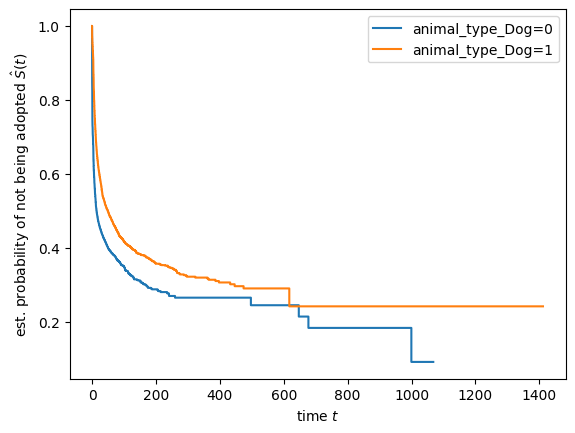

In [45]:
plot_survival_functions(data_dummified.loc[X_train.index] ,'outcome_type_not_adopted', 'time_in_shelter_days', 'animal_type_Dog')

In the next step, I will construct the model using the Cox Multivariate Model.

In [47]:
from sksurv.linear_model import CoxPHSurvivalAnalysis

estimator = CoxPHSurvivalAnalysis()
estimator = estimator.fit(X_train, y_train)

In the next step, I will show how does the particular variable influence the estimate the survival function (i.e. the
probability that an animal will not be adopted).

In [53]:
for val, var in sorted(zip(estimator.coef_, estimator.feature_names_in_), reverse=True):
    pad = len(f"Coef {var}, Point est. {val:.4f}")
    print(f"Coef {var.upper()} {'.'*(50-pad) } est. {(val):.4f}")

Coef IS_MIX .................... est. 0.0315
Coef AGE_UPON_INTAKE_(YEARS) .. est. -0.0092
Coef ANIMAL_TYPE_CAT .......... est. -0.5445
Coef ANIMAL_TYPE_DOG .......... est. -1.1696


The above given coefficients sow the logarithm of an increase in the proportionate hazard function. For better
interpretability, I will exponentiate them and subsequently subtract invert to see the direction of their effect

In [58]:
for val, var in sorted(zip(estimator.coef_, estimator.feature_names_in_), reverse=True):
    pad = len(f"Coef {var}, Point est. {val:.4f}")
    print(f"Coef {var.upper()} {'.'*(50-pad) } est. {1/np.exp(val):.4f}")

Coef IS_MIX .................... est. 0.9690
Coef AGE_UPON_INTAKE_(YEARS) .. est. 1.0092
Coef ANIMAL_TYPE_CAT .......... est. 1.7238
Coef ANIMAL_TYPE_DOG .......... est. 3.2208


The interpretation is following:
- Being of a mixed breed increases the probability of being adopted by 4 %
- Every year of age diminishes the probability by just less than 1 %
- Being a cat (compared to being a bird) increases the probability by 70 %
- Being a dog by 220 %

It has to be noted that the interpretability is zero. I will try to test the confidence in the following step:

## 2.2 Evaluation

In the next step, I will try to evaluate the model as a whole using the Censored Concordance Index

In [43]:
from sksurv.metrics import concordance_index_censored

prediction = estimator.predict(X_train)
result = concordance_index_censored(y_train["outcome_type_not_adopted"],
                                    y_train["time_in_shelter_days"], prediction)
result[0]

0.650630184786157

We may conclude that the model performs better than a random estimate according to a mean. However, the 0.65 value
hints that the model is not very good. Perhaps more effort could be devoted to feature engineering.

In the last step, I will sequentially test whether any of the variables is insignificant compared to the random model:

In [44]:
import numpy as np

def fit_and_score_features(X, y):
    n_features = X.shape[1]
    scores = np.empty(n_features)
    m = CoxPHSurvivalAnalysis()
    for j in range(n_features):
        Xj = X[:, j:j+1]
        m.fit(Xj, y)
        scores[j] = m.score(Xj, y)
    return scores

scores = fit_and_score_features(X_train.values, y_train)
pd.Series(scores, index=X_train.columns).sort_values(ascending=False)

animal_type_Dog            0.621569
animal_type_Cat            0.618720
age_upon_intake_(years)    0.609978
is_mix                     0.526466
dtype: float64

The above shown table shows that animal type is the most significant variable in our data set. Age is also
significant, however the breed seems to be rather weak covariate.

### 2.3 Generating Predictions

The following function can be used to generate survival function for any inidvidual, given our model:

In [95]:
def plot_sample_survival(estimator, X, id):
    if id is None:
        X_new = X.sample(len(id))
    else:
        X_new = pd.DataFrame(X.iloc[id,:])

    pred_surv = estimator.predict_survival_function(X_new)
    time_points = np.arange(1, estimator.event_times_.max())

    for i, surv_func in enumerate(pred_surv):
        plt.step(time_points, surv_func(time_points), where="post",
                 label=f"ID: {X_new.index[i]}")
    plt.ylabel("est. probability of survival $\hat{S}(t)$")
    plt.xlabel("time $t$")
    plt.legend(loc="best")

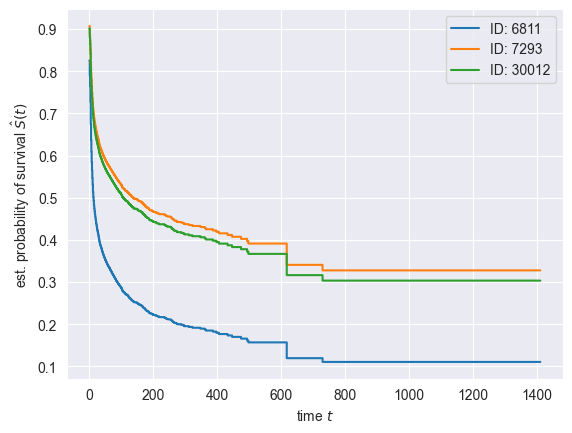

In [96]:
plot_sample_survival(estimator, X_test, [i for i in range(3)])

## Conclusion

Using Survival Analysis, I have analyzed the data of animal adoption in Austin, Texas. Our model seems to be working,
however the performance could surely be boosted by more extensive and thorough feature engineering. In this project, I
have relied heavily on the *sksurv* library and its user guide. The functions I have used are mostly own modification
(and generalization) of functions used in the *sksurv* tutorials.

[sksurv documentation](https://scikit-survival.readthedocs.io/en/stable/)